In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from pandas_profiling import ProfileReport
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
%matplotlib inline

# Чтение данных

In [7]:
# Constants
PATH = "../data/raw/train.csv"

In [8]:
data = pd.read_csv(PATH)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [34]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Визуализации

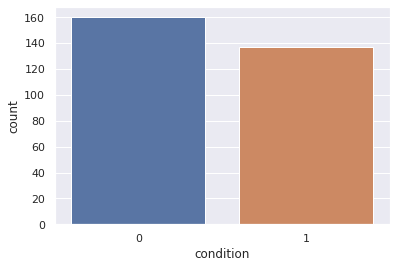

In [35]:
sns.countplot(x=data["condition"]); # соотношение болезни - нет

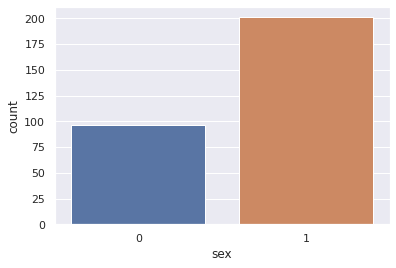

In [36]:
sns.countplot(x=data["sex"]); # соотношение мужчин - женщин

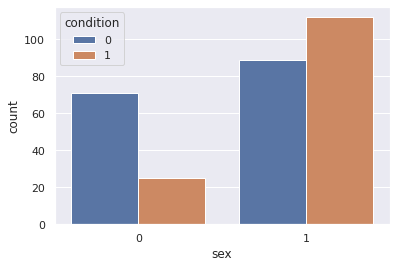

In [37]:
sns.countplot(data=data, x="sex", hue="condition"); # сравнение болезни среди мужчин - женщин

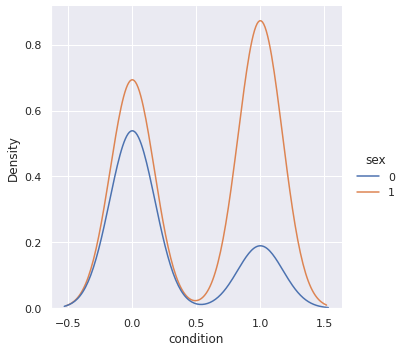

In [38]:
sns.displot(data=data, x="condition", hue="sex", kind="kde"); # распределение болезни среди мужчин и женщин

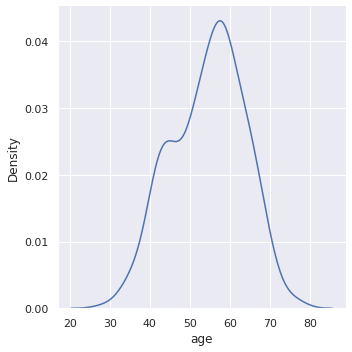

In [39]:
sns.displot(data=data, x="age", kind="kde");  # распределение возраста

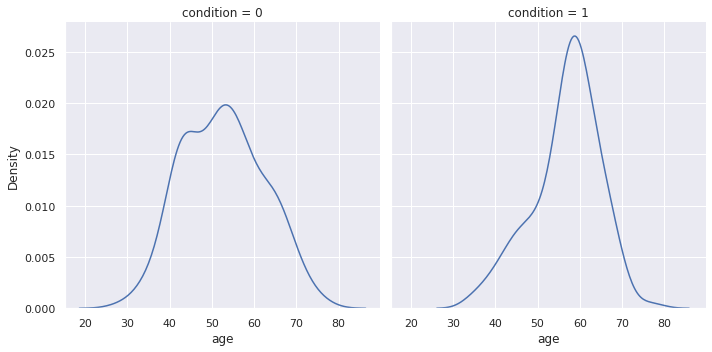

In [40]:
sns.displot(data=data, x="age", col="condition", kind="kde"); # Распределение возраста среди здоровых/нет

In [41]:
all_mans = len(data[data["sex"] == 1])
ill_mans = len(data[(data["sex"] == 1) & (data["condition"] == 1)])
all_womans = len(data[data["sex"] == 0])
ill_womans = len(data[(data["sex"] == 0) & (data["condition"] == 1)])
prc_man = ill_mans / all_mans
prc_woman = ill_womans / all_womans

In [42]:
print(f"Процент заболевших среди мужчн: {prc_man:.2f}")
print(f"Процент заболевших среди женщин: {prc_woman:.2f}")

Процент заболевших среди мужчн: 0.56
Процент заболевших среди женщин: 0.26


In [43]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) # Матрица корреляции

/tmp/ipykernel_6454/2039549325.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2) # Матрица корреляции


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.00,-0.09,0.11,0.29,0.20,0.13,0.15,-0.39,0.10,0.20,0.16,0.36,0.12,0.23
sex,-0.09,1.00,0.01,-0.07,-0.20,0.04,0.03,-0.06,0.14,0.11,0.03,0.09,0.37,0.28
cp,0.11,0.01,1.00,-0.04,0.07,-0.06,0.06,-0.34,0.38,0.20,0.15,0.24,0.27,0.41
trestbps,0.29,-0.07,-0.04,1.00,0.13,0.18,0.15,-0.05,0.07,0.19,0.12,0.10,0.13,0.15
chol,0.20,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.04,-0.01,0.12,0.02,0.08
fbs,0.13,0.04,-0.06,0.18,0.01,1.00,0.07,-0.01,-0.00,0.01,0.05,0.15,0.05,0.00
restecg,0.15,0.03,0.06,0.15,0.17,0.07,1.00,-0.07,0.08,0.11,0.14,0.13,0.01,0.17
thalach,-0.39,-0.06,-0.34,-0.05,-0.00,-0.01,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.26,-0.42
exang,0.10,0.14,0.38,0.07,0.06,-0.00,0.08,-0.38,1.00,0.29,0.25,0.15,0.32,0.42
oldpeak,0.20,0.11,0.20,0.19,0.04,0.01,0.11,-0.35,0.29,1.00,0.58,0.29,0.34,0.42


# Генерация отчета

In [18]:
import sweetviz
sweet_report = sweetviz.analyze(data)
sweet_report.show_html('sweet_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Разбиение выборки

In [16]:
X = data.drop(columns=["condition"])
y = data["condition"]

In [17]:
TEST_SZ = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SZ, random_state=42)

# Модели

In [18]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
rand_for = RandomForestClassifier()
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())    

In [19]:
def test_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

In [20]:
models = [log_reg, rand_for, knn_pipe]
names = ["LogisticRegression", "RandomForest", "KNN"]

In [21]:
for name, model in zip(names, models):
    print(f"{name}: f1_score = {test_model(model, X_train, y_train, X_test, y_test)}")

LogisticRegression: f1_score = 0.7241379310344827
RandomForest: f1_score = 0.7241379310344827
KNN: f1_score = 0.7333333333333334
